Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Plotting: Problem solving

# NOTE THIS IS UNFINISHED

- Basically a copy of Tasha's first part
- Below that is some live stuff I did in the open problem solving, which was more like tutoring that day

-------------------------

In this exercise we will look at some other kinds of plots using `plotly`, continuing with the `iris` dataset.

- Bar chart
- Histograms

## Plotly

To use <tt>plotly</tt>, 

- `import plotly.express` as `px`

In [1]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs_Python" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="libraryAlias" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

<!-- We will cover plotting and reading the following data visualizations in `plotly`:

- scatter plots 
- line graphs
- bar charts
- box plots
- plots for distributions (histograms and density plots)

We will specifically use the `plotly.express` library for quick and easy plotting. 

Keep in mind: some of the same plots can be done `plotly.graph_objs` and `plotly.figure_factory`. These libraries also allow for additional (and more complicated) plots or have additional flexibility.  -->

## Iris Data

To start to evaluate data, we need data. 
The `iris.csv` dataset contains data on iris flowers.
It contains 5 variables:

- `SepalLength`: the sepal length (cm)
- `SepalWidth`: the sepal width (cm)
- `PetalLength`: the petal length (cm)
- `PetalWidth`: the petal width (cm)
- `Species`: the flower species (cm)

We will need to load this into a dataframe.

- `import pandas` as `pd`

In [2]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="4+hh5$`7la4poj}NThGb">pd</variable></variables><block type="importAs_Python" id="jZlooI-[F!qAmKa{54n}" x="181" y="356"><field name="libraryName">pandas</field><field name="libraryAlias" id="4+hh5$`7la4poj}NThGb">pd</field></block></xml>

Now we need to read the dataset into the dataframe

- Create variable `dta_iris`
- Set it to `with pd do read_csv` using `datasets/iris.csv`

**Remember the `with ... do` block is in VARIABLES**

In [3]:
dta_iris = pd.read_csv('datasets/iris.csv')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="E*CJ3@KOAl*hkk/%JY3Y">dta_iris</variable><variable id="4+hh5$`7la4poj}NThGb">pd</variable></variables><block type="variables_set" id="eM|rNiy,R{-p1p$dVAR6" x="88" y="312"><field name="VAR" id="E*CJ3@KOAl*hkk/%JY3Y">dta_iris</field><value name="VALUE"><block type="varDoMethod_Python" id=".?df*Uxa+7wJ725Tdbys"><field name="VAR" id="4+hh5$`7la4poj}NThGb">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="text" id=":R(gdaN7{NF]`^4s*FOm"><field name="TEXT">datasets/iris.csv</field></block></value></block></value></block></xml>

## Bar plots

A simple bar plot in `plotly.express` has three arguments:


We're going to create a figure `fig_iris` using the function `scatter` in `plotly.express`.

Follow these steps:

- Create a variable `fig_iris`
- Get a `with px do scatter using` block
- Inside that block put a `create list with` block, and inside that block put
    - `dta_iris` (from VARIABLES)
    - a freestyle block with `x="SepalWidth"` in it
    - a freestule block with `y="SepalLength"` in it

In [12]:
fig_iris = px.scatter(dta_iris, x="SepalWidth", y="SepalLength")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".Y9~^4%y]rs,A!j8aXw0">fig_iris</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="E*CJ3@KOAl*hkk/%JY3Y">dta_iris</variable></variables><block type="variables_set" id="24~lvUEzpxJ.@DlUnzGj" x="39" y="263"><field name="VAR" id=".Y9~^4%y]rs,A!j8aXw0">fig_iris</field><value name="VALUE"><block type="varDoMethod_Python" id="7PkTI5@+A6#C}J7CTmyF"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="INPUT"><block type="lists_create_with" id="g^2EaX(wo6etoMYs:5}O"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="DrBaD`rGEl+a=qpT5bB%"><field name="VAR" id="E*CJ3@KOAl*hkk/%JY3Y">dta_iris</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="OV{Q|p7%(i3^iQ[r?iKK"><field name="CODE">x="SepalWidth"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="pBCyv)dF:mB_w6xB02(/"><field name="CODE">y="SepalLength"</field></block></value></block></value></block></value></block></xml>

It did not display! Why? Use the fuction `show` to display the scatter plot of the relationship between sepal width and sepal length.

- `with fig_iris do show`

**It may take ~ 10 seconds for the block to create the dropdown and a similary amount of time for the plot to display.**

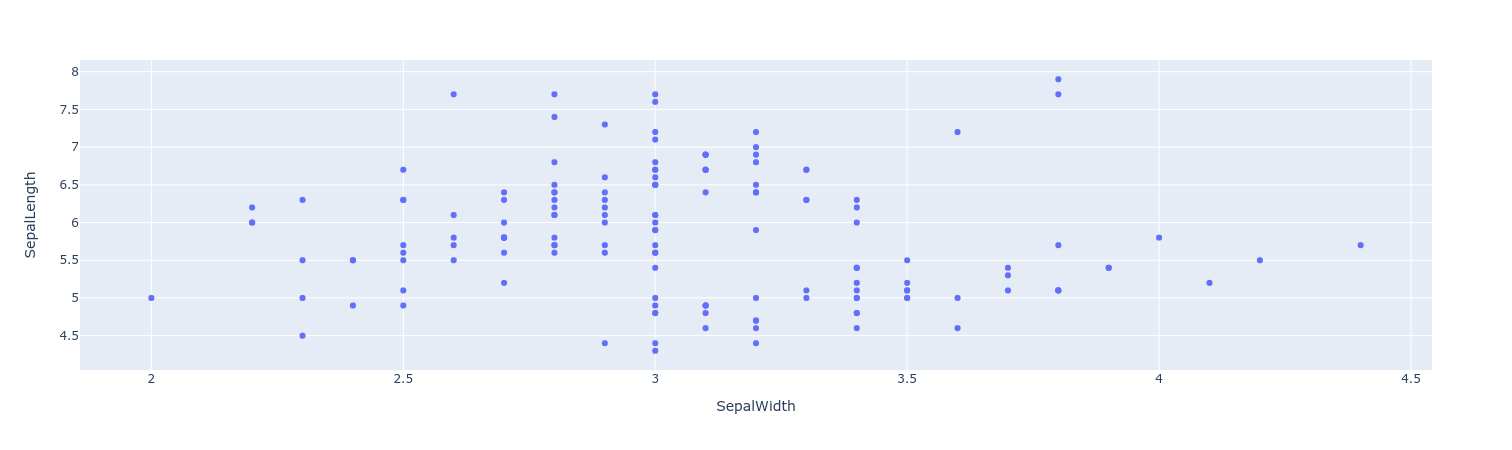

In [13]:
fig_iris.show()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".Y9~^4%y]rs,A!j8aXw0">fig_iris</variable></variables><block type="varDoMethod_Python" id="Y3*:nG98oP04XKV=JbYK" x="8" y="188"><field name="VAR" id=".Y9~^4%y]rs,A!j8aXw0">fig_iris</field><field name="MEMBER">show</field><data>fig_iris:show</data></block></xml>

Our first plot! Basic, but provides an initial visualization to evaluate our question: is there are relationship between sepal width and sepal length?

We can see the plot has some interactive features displayed in the top right corner. These tools may be useful but the topic is tabled for later discussion. 

Without these tools, we are still interested in improving the visualization. But how? We can improve these visualizations with <b>better display of the graphic</b> or <b>deeper evaluation of the pattern</b>.

#### better display of the graphic

A better display of the graphic means adding more freestyle blocks to the list with the following:
    
- the title  

`title = "Your Title"`
- the axis labels  

`labels = {'XVar':'Label for XVar','XVar':'Label for XVar'}`
- the template from options `plotly`, `plotly_white`, `plotly_dark`, `ggplot2`, `seaborn`, `simple_white`, and `none`

`template = "Your Template"` 
- the color scheme from color options <a href="https://plotly.com/python/discrete-color/#color-sequences-in-plotly-express" target="_top">here</a>

`color_discrete_sequence=px.colors.qualitative.YOUR_SCHEME`
- and others

See the documentation of the possible arguments for <a href="https://plotly.com/python-api-reference/generated/plotly.express.scatter.html" target="_top">`scatter`</a> in `plotly`.

Create a new figure by improving the display of the graphic called `fig_iris_better`:

- Copy the `with px do scatter` block (and contents) from above and paste it into the code cell below
- Create a variable `fig_iris_better` and connect it to the `with px do scatter` block
- Expand the list using the gear icon and add the following freestyle blocks:
    - `title_text="Relationship between Sepal Length and Sepal Width"`
    - `labels = {'SepalWidth':'Sepal Width (cm)', 'SepalLength':'Sepal Length (cm)'}`
    - `template = "simple_white"`
    - `color_discrete_sequence=px.colors.qualitative.Antique`

In [14]:
fig_iris_better = px.scatter(dta_iris, x="SepalWidth", title="Relationship between Sepal Length and Sepal Width", y="SepalLength", labels = {'SepalWidth':'Sepal Width (cm)', 'SepalLength':'Sepal Length (cm)'}, template = "simple_white", color_discrete_sequence=px.colors.qualitative.Antique)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M$7,=.n3XI;72Sc2?yZB">fig_iris_better</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="E*CJ3@KOAl*hkk/%JY3Y">dta_iris</variable></variables><block type="variables_set" id="dNa8i.]BBuN01p)!A%Q}" x="3" y="268"><field name="VAR" id="M$7,=.n3XI;72Sc2?yZB">fig_iris_better</field><value name="VALUE"><block type="varDoMethod_Python" id="4VAv|I~+YZq{5y?U!1ie"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="INPUT"><block type="lists_create_with" id="6;}Q,@|krL*@r#UDqxIP"><mutation items="7"></mutation><value name="ADD0"><block type="variables_get" id="ANJVsQbaRe9+AU2!DP-6"><field name="VAR" id="E*CJ3@KOAl*hkk/%JY3Y">dta_iris</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id=",~EBM7Qo_j}!+5_0A4OV"><field name="CODE">x="SepalWidth"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="?sz9)L}iOKefMe!VJB{B"><field name="CODE">title="Relationship between Sepal Length and Sepal Width"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_Python" id="4$e3$47S;ld%pp7nY^^x"><field name="CODE">y="SepalLength"</field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock_Python" id="NMY%5Yr8S}Tu7}-Ih.OD"><field name="CODE">labels = {'SepalWidth':'Sepal Width (cm)', 'SepalLength':'Sepal Length (cm)'}</field></block></value><value name="ADD5"><block type="dummyOutputCodeBlock_Python" id="#:[=%`Op88Xc;16?;?X0"><field name="CODE">template = "simple_white"</field></block></value><value name="ADD6"><block type="dummyOutputCodeBlock_Python" id="(95,{LE2-1/^MdBlYmvb"><field name="CODE">color_discrete_sequence=px.colors.qualitative.Antique</field></block></value></block></value></block></value></block></xml>

As before, we need to show the figure:

- `with fig_iris_better do show`

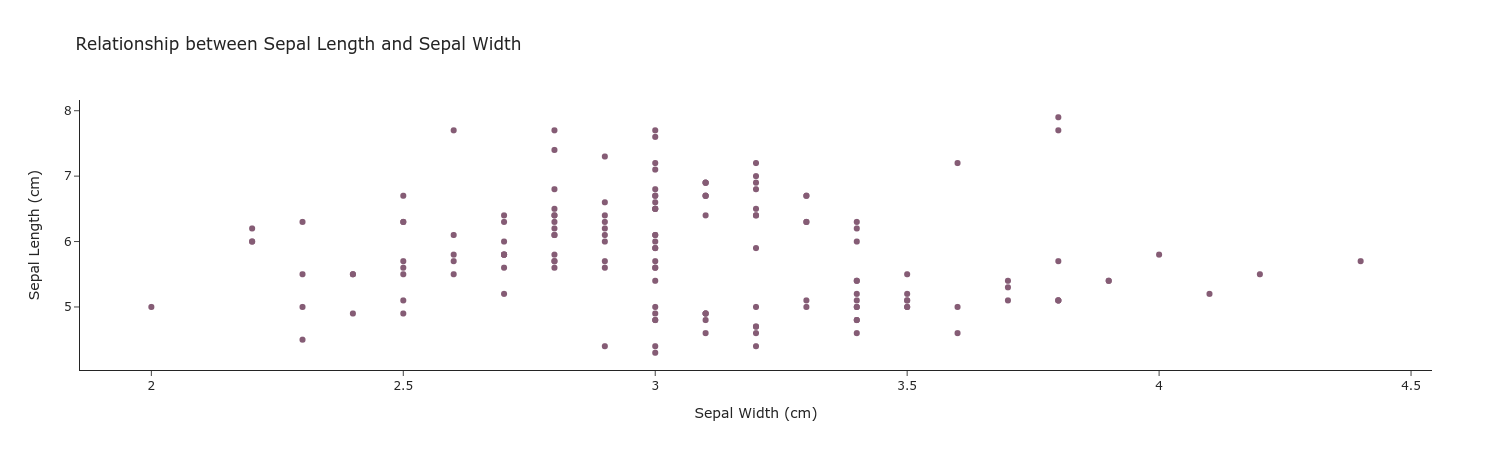

In [15]:
fig_iris_better.show()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M$7,=.n3XI;72Sc2?yZB">fig_iris_better</variable></variables><block type="varDoMethod_Python" id="_t]wLbN%9D#gH*v@AoR2" x="8" y="188"><field name="VAR" id="M$7,=.n3XI;72Sc2?yZB">fig_iris_better</field><field name="MEMBER">show</field><data>fig_iris_better:show</data></block></xml>

------------------------------------------

In [1]:
import plotly.express as px
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="R0W*r,/Q+qjZi@+oLc]m">px</variable><variable id="}CjLI}W!W+3^j5KzBf~3">pd</variable></variables><block type="importAs_Python" id="Z{e-#+iUGB:h)Utpckjd" x="48" y="65"><field name="libraryName">plotly.express</field><field name="libraryAlias" id="R0W*r,/Q+qjZi@+oLc]m">px</field><next><block type="importAs_Python" id=")gija[[5#|Sy4kt(v;YW"><field name="libraryName">pandas</field><field name="libraryAlias" id="}CjLI}W!W+3^j5KzBf~3">pd</field></block></next></block></xml>

In [2]:
newDataFrame = pd.read_csv('datawhys-content-notebooks/datasets/iris.csv')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~e(P%M|j[C=Zss;/9P_Y">newDataFrame</variable><variable id="}CjLI}W!W+3^j5KzBf~3">pd</variable></variables><block type="variables_set" id="q^(97.ezOHRys+`g2]nl" x="18" y="178"><field name="VAR" id="~e(P%M|j[C=Zss;/9P_Y">newDataFrame</field><value name="VALUE"><block type="varDoMethod_Python" id="W.3z,QDo{QUy:zbX`1Pq"><field name="VAR" id="}CjLI}W!W+3^j5KzBf~3">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="text" id="Q%cR#ljrdWJa+C]`}/[%"><field name="TEXT">datawhys-content-notebooks/datasets/iris.csv</field></block></value></block></value></block></xml>

In [7]:
barPlot = px.bar(newDataFrame, x="Species", y="PetalLength")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="}z6KoAi0V~u4U)Y8lwd,">barPlot</variable><variable id="R0W*r,/Q+qjZi@+oLc]m">px</variable><variable id="~e(P%M|j[C=Zss;/9P_Y">newDataFrame</variable></variables><block type="variables_set" id="*I.Yfz$L8WICiHKS-`N%" x="105" y="197"><field name="VAR" id="}z6KoAi0V~u4U)Y8lwd,">barPlot</field><value name="VALUE"><block type="varDoMethod_Python" id="W*lA{j3812JPIM{robh1"><field name="VAR" id="R0W*r,/Q+qjZi@+oLc]m">px</field><field name="MEMBER">bar</field><data>px:bar</data><value name="INPUT"><block type="lists_create_with" id="``rT(NQfS}K%3K,+zTU["><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="4Aq+v%mDQFJeXoW$PEB5"><field name="VAR" id="~e(P%M|j[C=Zss;/9P_Y">newDataFrame</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="CN[BbrCnFbb$z-`%,n_("><field name="CODE">x="Species"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="xUn|#h?ptxzPOuj*AJY1"><field name="CODE">y="PetalLength"</field></block></value></block></value></block></value></block></xml>

# Note this seems sub optimal: it is the sum of the data rather than the mean; it may work OK here because each class is equally represented

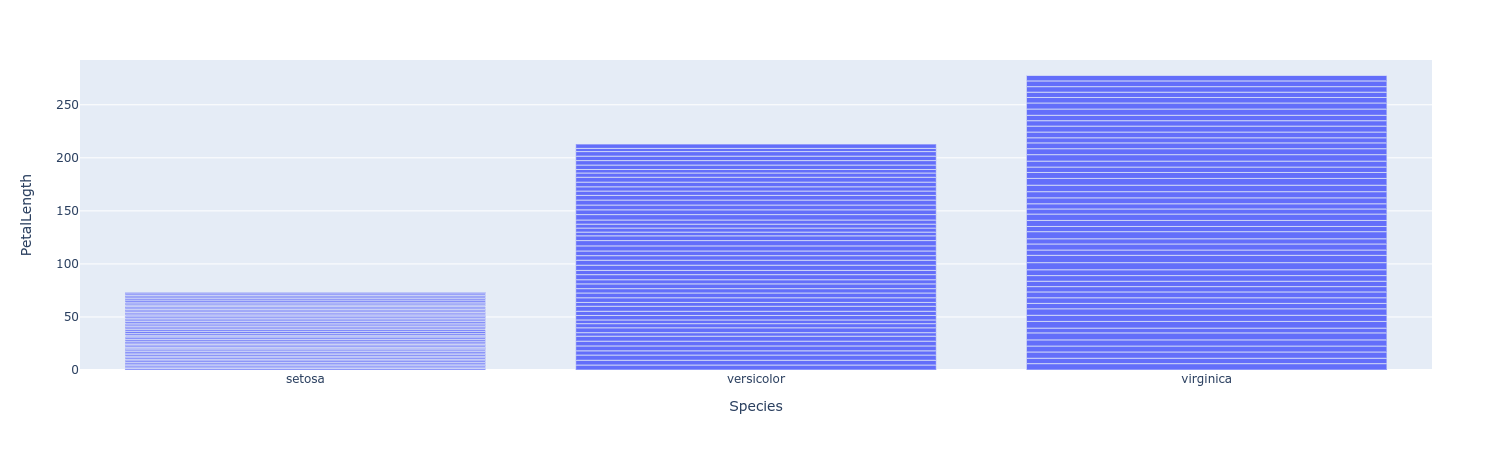

In [8]:
barPlot.show()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="}z6KoAi0V~u4U)Y8lwd,">barPlot</variable></variables><block type="varDoMethod_Python" id="ki2@X:/|31i6wBeY4c/-" x="8" y="188"><field name="VAR" id="}z6KoAi0V~u4U)Y8lwd,">barPlot</field><field name="MEMBER">show</field><data>barPlot:show</data></block></xml>

In [11]:
histogram = px.histogram(newDataFrame, x="PetalLength")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="|W_`AU%bLvdD1u9fMM62">histogram</variable><variable id="R0W*r,/Q+qjZi@+oLc]m">px</variable><variable id="~e(P%M|j[C=Zss;/9P_Y">newDataFrame</variable></variables><block type="variables_set" id="i$pWNrhm`(@dN#L5@|e@" x="105" y="197"><field name="VAR" id="|W_`AU%bLvdD1u9fMM62">histogram</field><value name="VALUE"><block type="varDoMethod_Python" id="u=`SawaM%oie.naljxH|"><field name="VAR" id="R0W*r,/Q+qjZi@+oLc]m">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="INPUT"><block type="lists_create_with" id="]WS.U.l!18xVAMZO#jW["><mutation items="2"></mutation><value name="ADD0"><block type="variables_get" id="BDy2)=5-UP=o*qH[kdi}"><field name="VAR" id="~e(P%M|j[C=Zss;/9P_Y">newDataFrame</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="fuDBXBR1/5KoKyEcQ{;G"><field name="CODE">x="PetalLength"</field></block></value></block></value></block></value></block></xml>

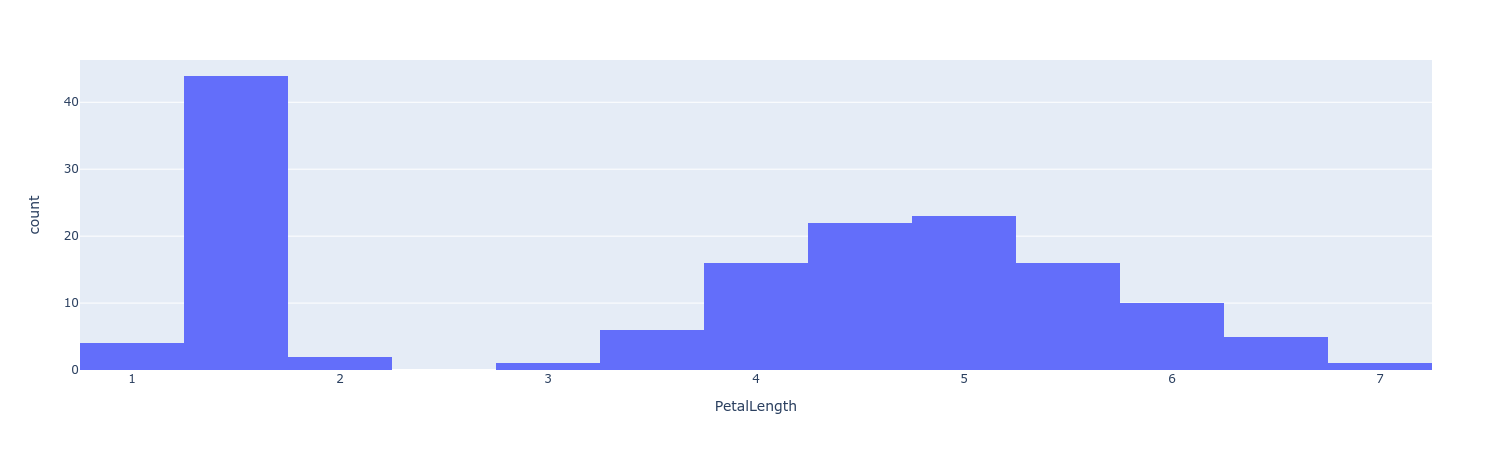

In [10]:
histogram.show()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="|W_`AU%bLvdD1u9fMM62">histogram</variable></variables><block type="varDoMethod_Python" id="ki2@X:/|31i6wBeY4c/-" x="8" y="188"><field name="VAR" id="|W_`AU%bLvdD1u9fMM62">histogram</field><field name="MEMBER">show</field><data>histogram:show</data></block></xml>